# Neural Network: Binary Classification

## Import relevant modules

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np

import pandas as pd
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import layers

from matplotlib import pyplot as plt
import seaborn as sns

print("Imported modules.")

Imported modules.


## Get Data

[California Housing Dataset](https://developers.google.com/machine-learning/crash-course/california-housing-data-description).

* `train_df`, which contains the training set
* `test_df`, which contains the test set
   

In [ ]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
print(train_df.shape)

test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")
print(test_df.shape)

(17000, 9)
(3000, 9)


## Preprocess the Data

* **Shuffle** the training data
* **Normalize** the data using z-value

In [ ]:
# Shuffle the training examples
train_df = train_df.reindex(np.random.permutation(train_df.index)) 

# Normalize the data
train_df_norm = (train_df - train_df.mean())/train_df.std()
test_df_norm = (test_df - test_df.mean())/test_df.std()

print("Preprocessed the data.")

Preprocessed the data.


## Feature Representation

Features layer:
* `latitude` x `longitude` *feature cross*
* `median_income`
* `population`

Note: The transformations (collected in `feature_layer`) don't actually get applied until you pass a DataFrame to it, which will happen when we train the model. 

In [ ]:
# To Floating point
latitude_numeric = tf.feature_column.numeric_column("latitude")
longitude_numeric = tf.feature_column.numeric_column("longitude")
median_income = tf.feature_column.numeric_column("median_income")
population = tf.feature_column.numeric_column("population")

# To buckets: latitude and longitude
resolution = 0.3
latitude_boundaries = list(np.arange(int(min(train_df_norm['latitude'])),int(max(train_df_norm['latitude'])), resolution))
longitude_boundaries = list(np.arange(int(min(train_df_norm['longitude'])), int(max(train_df_norm['longitude'])), resolution))
latitude = tf.feature_column.bucketized_column(latitude_numeric, latitude_boundaries)
longitude = tf.feature_column.bucketized_column(longitude_numeric, longitude_boundaries)

# Feature cross: latitude and longitude
latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_lat_long = tf.feature_column.indicator_column(latitude_x_longitude)

# Create Feature layer to be fed to the NN
feature_columns = []
feature_columns.append(crossed_lat_long)  
feature_columns.append(median_income)
feature_columns.append(population)
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

## Create Plotting Function
* `plot_curve`: plot the loss per epoch

In [ ]:
def plot_curve(epochs, mse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")
  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()

## Task 1: Simple Linear Regression model

Epoch 1/15
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
17/17 [==============================] - 0s 3ms/step - loss: 0.9298 - mean_squared_error: 0.9298
Epoch 2/15
17/17 [==============================] - 0s 3ms/step - loss: 0.6124 - mean_squared_error: 0.6124
Epoch 3/15
17/17 [==============================] - 0s 3ms/step - loss: 0.4693 - mean_squared_error: 0.4693
Epoch 4/15
17/17 [==============================] - 0s 3ms/step - loss: 0.4076 - mean_squared_error: 0.4076
Epoch 5/15
17/17 [==============================] - 0s 3ms/step - loss: 0.3705 - mean_squared_error: 0.3705
Epoch 6/15
17/17 [==============================] - 0s 3ms/step - loss: 0.3631 - mean_squared_error: 0.3631
Epoch 7/15
17/17 [==============================] - 0s 3ms/step - loss: 0.3628 - mean_squared_error: 0.3628
Epoch 8/15
17/17 [==============================] - 0s 3ms/step - loss: 0.3678 - mean_squared_error: 0.3678
Epoch 9/15
17/17 [========

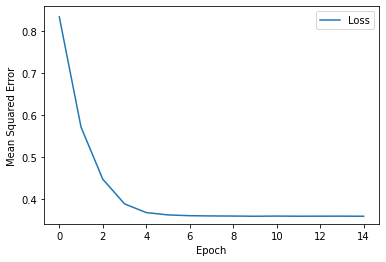

Consider rewriting this model with the Functional API.
3/3 [==============================] - 0s 4ms/step - loss: 0.3960 - mean_squared_error: 0.3960


[0.3960238993167877, 0.3960238993167877]

In [ ]:
def create_model(lr, feature_layer):
  model = tf.keras.models.Sequential() # sequential model
  model.add(feature_layer) # feature layer
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,))) # linear regressor
  model.compile(
      loss="mean_squared_error",
      metrics=[tf.keras.metrics.MeanSquaredError()],
      optimizer=tf.keras.optimizers.RMSprop(lr=lr)
  )
  return model           

def train_model(model, dataset, epochs, batch_size, label_name):
  # Define features and label in dataset
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  # Train the model
  history = model.fit(x=features, y=label, batch_size=batch_size, epochs=epochs, shuffle=True)
  # Get details for plotting the loss curve.
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["mean_squared_error"]
  return epochs, rmse

# Set the hyperparameters
learning_rate = 0.01
epochs = 15
batch_size = 1000
label_name = "median_house_value"

# Establish the model's topography
my_model = create_model(learning_rate, feature_layer)

# Train the model on the normalized training set
epochs, mse = train_model(my_model, train_df_norm, epochs, batch_size, label_name)
plot_curve(epochs, mse)

# Evaluate the model on normalized test set
test_features = {name:np.array(value) for name, value in test_df_norm.items()} # get features
test_label = np.array(test_features.pop(label_name)) # isolate the label
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)

## Task 2: Deep Neural Network model

Epoch 1/20
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
17/17 [==============================] - 0s 3ms/step - loss: 0.7509 - mean_squared_error: 0.7509
Epoch 2/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3749 - mean_squared_error: 0.3749
Epoch 3/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3559 - mean_squared_error: 0.3559
Epoch 4/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3344 - mean_squared_error: 0.3344
Epoch 5/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3312 - mean_squared_error: 0.3312
Epoch 6/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3286 - mean_squared_error: 0.3286
Epoch 7/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3384 - mean_squared_error: 0.3384
Epoch 8/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3302 - mean_squared_error: 0.3302
Epoch 9/20
17/17 [========

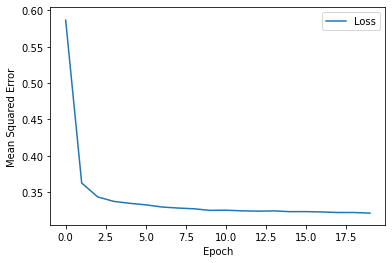

Consider rewriting this model with the Functional API.
3/3 [==============================] - 0s 4ms/step - loss: 0.3631 - mean_squared_error: 0.3631


[0.363125741481781, 0.363125741481781]

In [ ]:
def create_model(my_learning_rate, my_feature_layer):
  model = tf.keras.models.Sequential()
  model.add(feature_layer)
  model.add(tf.keras.layers.Dense(units=20, activation='relu', name='Hidden1'))
  model.add(tf.keras.layers.Dense(units=12, activation='relu', name='Hidden2'))
  model.add(tf.keras.layers.Dense(units=1, name='Output'))                              
  model.compile(
      loss="mean_squared_error",
      metrics=[tf.keras.metrics.MeanSquaredError()],
      optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate)
  )
  return model

def train_model(model, dataset, epochs, label_name, batch_size=None):
  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  # Train the model
  history = model.fit(x=features, y=label, batch_size=batch_size, epochs=epochs, shuffle=True) 
  # Store details for plotting
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  mse = hist["mean_squared_error"]
  return epochs, mse

# Set the hyperparameters.
learning_rate = 0.01
epochs = 20
batch_size = 1000

# Specify the label
label_name = "median_house_value"

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer)

# Train the model on the normalized training set.
epochs, mse = train_model(my_model, train_df_norm, epochs, label_name, batch_size)
plot_curve(epochs, mse)

# Evaluate the model against the test set.
test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)

### Compare the NN model with DNN model

* The loss of the deep neural network model was consistently lower than 
that of the simple linear regression model.
* Deep neural network model makes better predictions than the linear regression model.

## Task 3: Optimize the Deep Neural Network model

Goal: (may be in conflict)
*  Lower the test loss.
*  Minimize the overall number of nodes in the deep neural net. 

Experiment:
* Number of layers of the model
* Number of nodes in each layer

Observation:
* Two layers outperformed one layer
* Three layers did not perform significantly better than two layers.

Optimized model topography:
* 10 nodes in the first layer.
*  6 nodes in the second layer.

Tradeoffs:
* As the number of nodes in each layer dropped, the test loss may incnrease.  
* Depending on the application use and the hardware constraints, a smaller network might be acceptable.

## Task 4: Regularize the Deep Neural Network

Observations:
* The model's `test loss > training loss`.  
* In other words, the network is [overfitting](https://developers.google.com/machine-learning/glossary/#overfitting) to the data in the training set.  

Goal:
* Experiment with one or more regularization mechanisms to bring the test loss closer to the training loss.
* Keep the test loss relatively low. 

Actions:
  * [L1 regularization](https://developers.google.com/machine-learning/glossary/#L1_regularization)
  * [L2 regularization](https://developers.google.com/machine-learning/glossary/#L2_regularization)
  * [Dropout regularization](https://developers.google.com/machine-learning/glossary/#dropout_regularization)

**Note:** When you add a regularization function to a model, you might need to tweak other hyperparameters. 

### Implementing L1 or L2 regularization

To use L1 or L2 **regularization on a hidden layer**, specify the `kernel_regularizer` argument to [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense). Assign one of the following methods to this argument:

* `tf.keras.regularizers.l1` for L1 regularization
* `tf.keras.regularizers.l2` for L2 regularization

Each of the preceding methods takes an `l` parameter (0 and 1), which adjusts the [regularization rate](https://developers.google.com/machine-learning/glossary/#regularization_rate). 

```
model.add(tf.keras.layers.Dense(units=20, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01), name='Hidden1'))
```

### Implementing Dropout regularization

Implement dropout regularization as a **separate layer in the topography**.

The `rate` parameter to [tf.keras.layers.Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) specifies the fraction of nodes that the model should drop out during training.

```
model.add(tf.keras.layers.Dense( *define first hidden layer*)
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Dense( *define second hidden layer*)
```
 

Epoch 1/140
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
17/17 [==============================] - 1s 3ms/step - loss: 2.4672 - mean_squared_error: 0.9992
Epoch 2/140
17/17 [==============================] - 0s 4ms/step - loss: 1.0676 - mean_squared_error: 0.6643
Epoch 3/140
17/17 [==============================] - 0s 3ms/step - loss: 0.6763 - mean_squared_error: 0.4671
Epoch 4/140
17/17 [==============================] - 0s 3ms/step - loss: 0.5693 - mean_squared_error: 0.4422
Epoch 5/140
17/17 [==============================] - 0s 3ms/step - loss: 0.5189 - mean_squared_error: 0.4224
Epoch 6/140
17/17 [==============================] - 0s 3ms/step - loss: 0.4914 - mean_squared_error: 0.4109
Epoch 7/140
17/17 [==============================] - 0s 3ms/step - loss: 0.4718 - mean_squared_error: 0.3965
Epoch 8/140
17/17 [==============================] - 0s 3ms/step - loss: 0.4668 - mean_squared_error: 0.3955
Epoch 9/140
17/17 

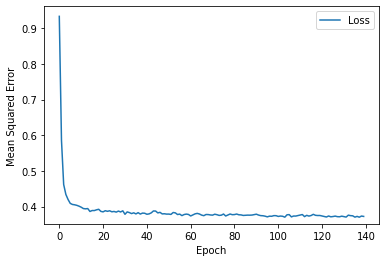

Consider rewriting this model with the Functional API.
3/3 [==============================] - 0s 6ms/step - loss: 0.4120 - mean_squared_error: 0.3734


[0.4119853377342224, 0.3733747601509094]

In [ ]:
def create_model(my_learning_rate, my_feature_layer):
  model = None
  model = tf.keras.models.Sequential()
  model.add(my_feature_layer)
  model.add(tf.keras.layers.Dense(units=20, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.04), name='Hidden1'))
  model.add(tf.keras.layers.Dropout(rate=0.25))
  model.add(tf.keras.layers.Dense(units=12, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.04), name='Hidden2'))
  model.add(tf.keras.layers.Dense(units=1, name='Output'))                              
  model.compile(
      loss="mean_squared_error",
      metrics=[tf.keras.metrics.MeanSquaredError()],
      optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate)
  )
  return model     

learning_rate = 0.007
epochs = 140
batch_size = 1000

label_name = "median_house_value"

my_model = create_model(learning_rate, feature_layer)

epochs, mse = train_model(my_model, train_df_norm, epochs, label_name, batch_size)
plot_curve(epochs, mse)

test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size) 